In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import random
import time


In [41]:
seed = np.random.RandomState(12345)

arrays = []

LENGTH = 2001

for size in range(LENGTH):
    arrays.append(seed.randint(low=-30, high=30, size=size))

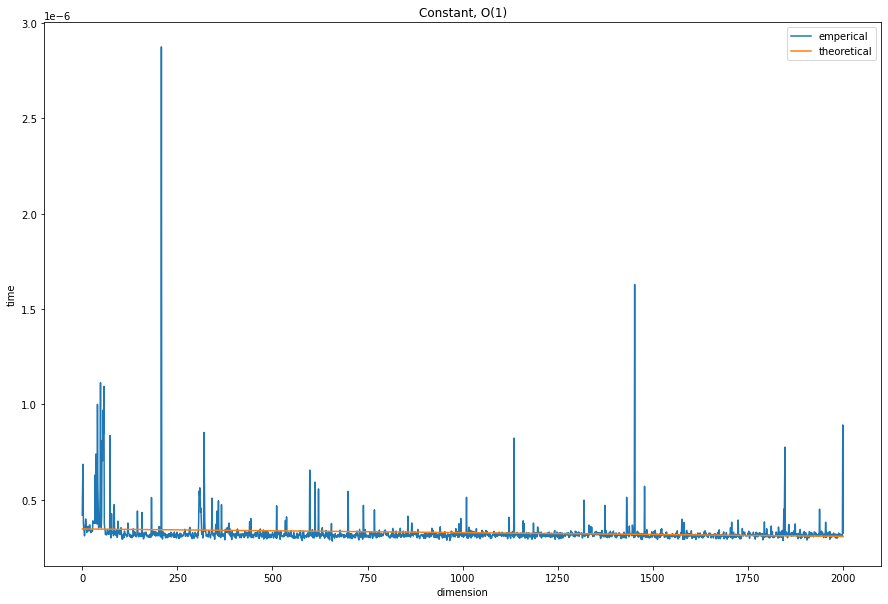

In [113]:
def constant(array):
    return array

timestamp_means = []

for i in range(LENGTH):
        t = %timeit -n1 -r 5 -o -q constant(arrays[i])
        timestamp_means.append(t.average)
        
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

x = np.array(list(range(LENGTH)))
y = timestamp_means
ax.plot(x, y, label='emperical',,  linewidth=5)

k, b = np.polyfit(np.array(x), np.array(y), 1)
y1 = k * np.array(x) + b
ax.plot(x, y1, label='theoretical')

ax.set_xlabel(r'dimension')
ax.set_ylabel('time')
ax.set_title('Constant, O(1)')
ax.legend()

plt.show()





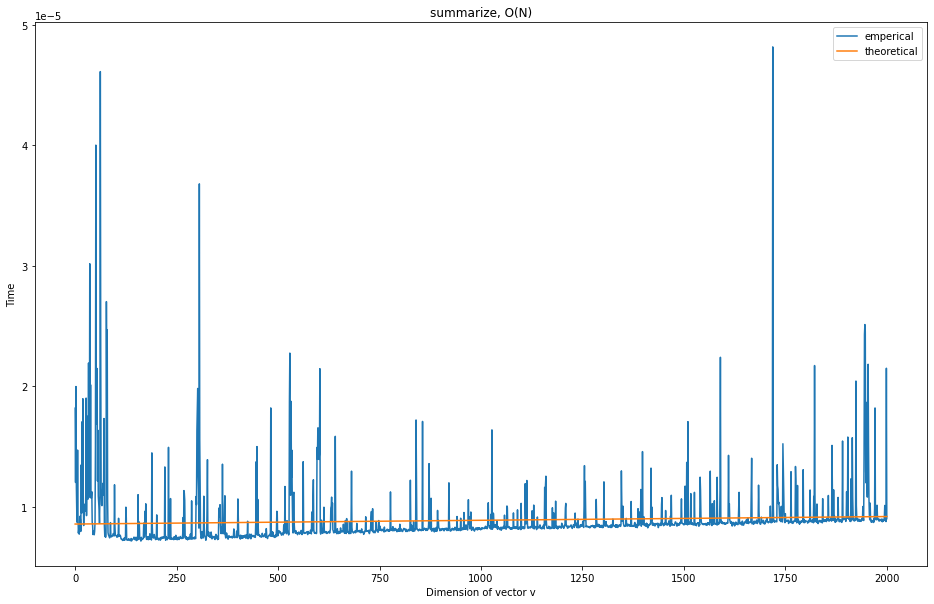

In [76]:
def summarize(array):
    return np.sum(array)

timestamp_means = []

for i in range(LENGTH):
        t = %timeit -o -q -n1 -r 5 summarize(arrays[i])
        timestamp_means.append(t.average)
        
fig, ax = plt.subplots(1, 1, figsize=(16, 10))

x = np.array(list(range(LENGTH)))
y = timestamp_means
ax.plot(x, y, label='emperical')

a = np.polyfit(np.array(x), np.array(y), 1)
y1 = k * np.array(x) + b
ax.plot(x, y1, label='theoretical')

ax.set_xlabel(r'dimension')
ax.set_ylabel('time')
ax.set_title('Summarize, O(N)')
ax.legend()

plt.show()





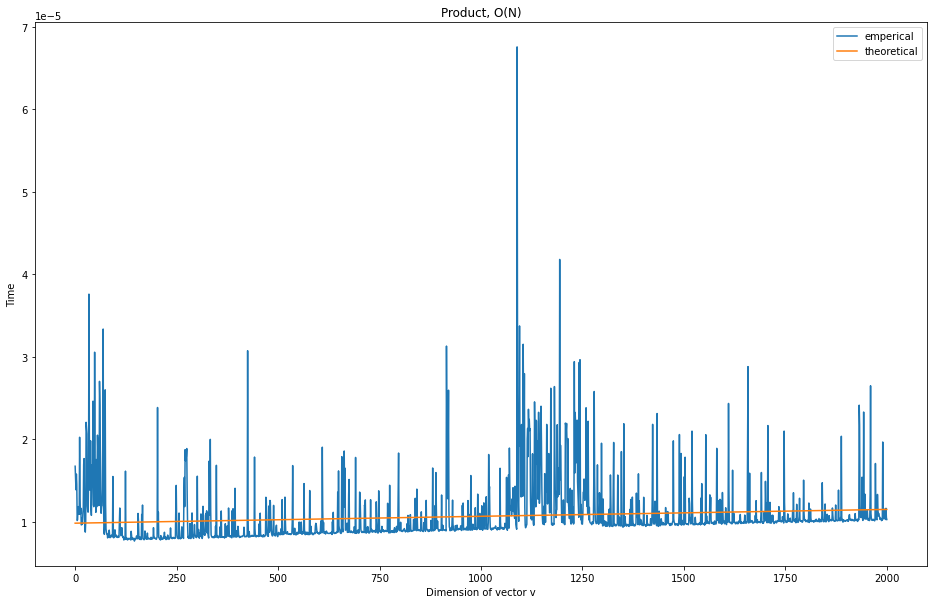

In [73]:
def product(array):
    return np.product(array)

timestamp_means = []

for i in range(LENGTH):
        t = %timeit -n1 -r 5 -o -q product(arrays[i])
        timestamp_means.append(t.average)
        
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

x = np.array(list(range(LENGTH)))
y = timestamp_means
ax.plot(x, y, label='emperical')

k, b = np.polyfit(np.array(x), np.array(y), 1)
y1 = k * np.array(x) + b
ax.plot(x, y1, label='theoretical')

ax.set_xlabel(r'dimension')
ax.set_ylabel('time')
ax.set_title('Product, O(N)')
ax.legend()

plt.show()





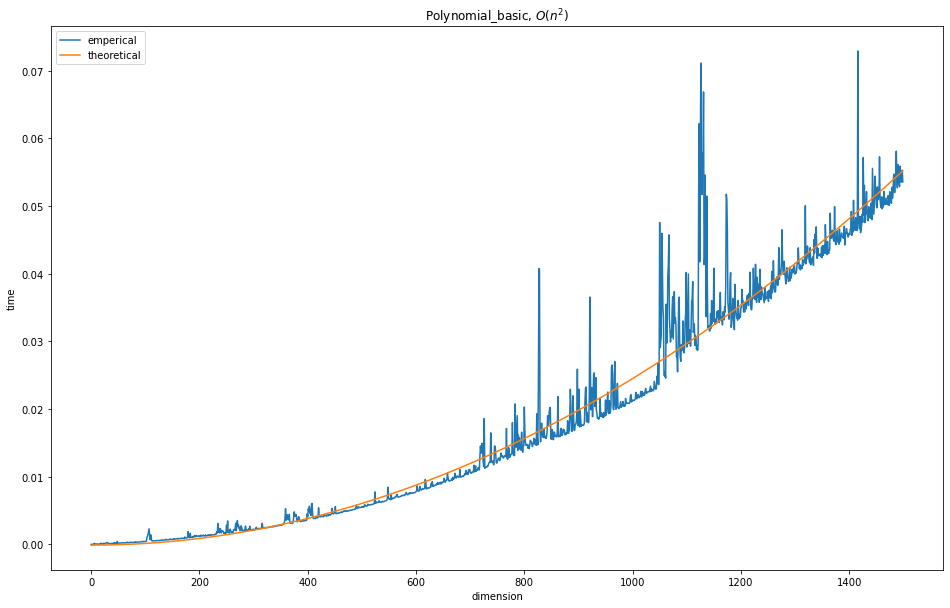

In [87]:
def polynomial_basic(array, value=1.5):
    def pow(value, power):
        result = 1
        for i in range(power):
            result = result * value
        return result
    
    def calc_p(array):
        result = 0
        for i in range(len(array)):
            result = result + (array[i] * pow(value, i))
        return result
    return calc_p(array)



timestamp_means = []

for i in range(1500):
        t = %timeit -o -q -n1 -r 5  polynomial_basic(arrays[i])
        timestamp_means.append(t.average)
        
fig, ax = plt.subplots(1, 1, figsize=(15, 10))


x = np.array(list(range(1500)))
y = timestamp_means
ax.plot(x, y, label='emperical')

k,b = np.polyfit(np.array(x)**2, np.array(y), 1)
y1 = k * np.array(x)**2 + b
ax.plot(x, y1, label='theoretical',)

ax.set_xlabel(r'dimension')
ax.set_ylabel('time')
ax.set_title('Polynomial_basic, $O(n^2)$')
ax.legend()

plt.show()


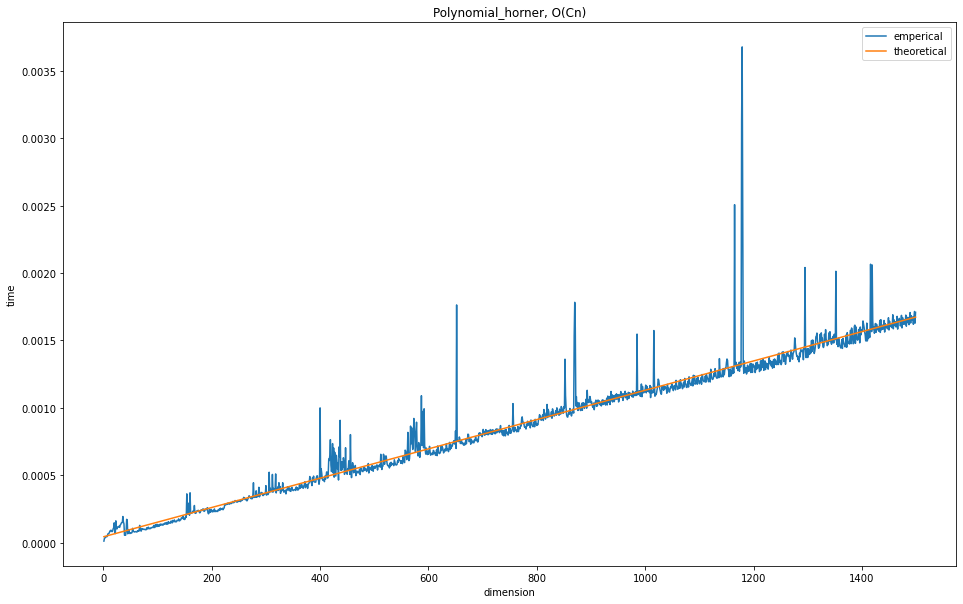

In [96]:
def polynomial_horner(array, value=1.5): 
    n = len(array)
    result = array[-1]
    for i in np.arange(1, n):
        result = result * value + array[n - i - 1]
    return result

timestamp_means = []

for i in range(1,1500):
        t = %timeit -o -q -n1 -r 5  polynomial_horner(arrays[i])
        timestamp_means.append(t.average)
        
fig, ax = plt.subplots(1, 1, figsize=(15, 10))


x = np.array(list(range(1,1500)))
y = timestamp_means
ax.plot(x, y, label='emperical')

k,b = np.polyfit(np.array(x), np.array(y), 1)
y1 = k * np.array(x) + b
ax.plot(x, y1, label='theoretical')

ax.set_xlabel(r'dimension')
ax.set_ylabel('time')
ax.set_title('Polynomial_horner, O(Cn)')
ax.legend()

plt.show()


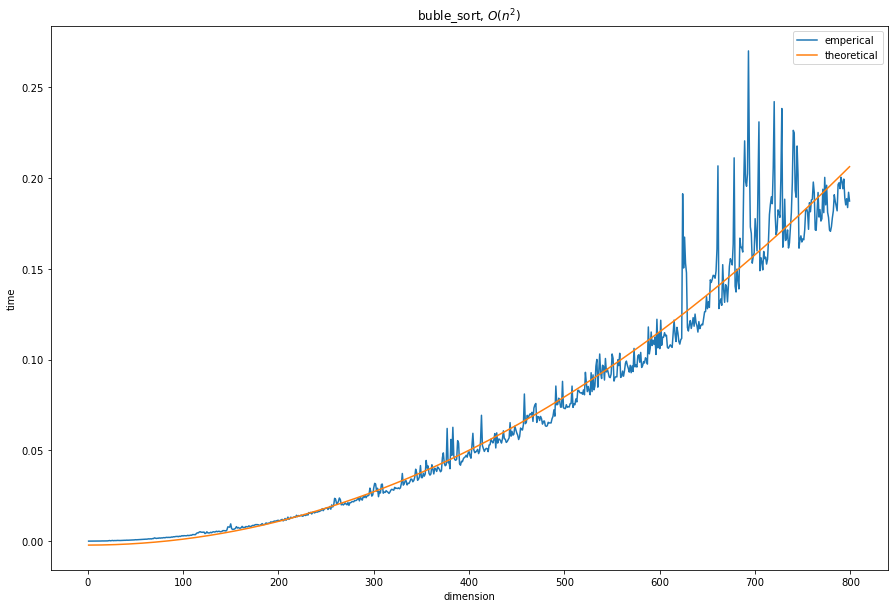

In [115]:
def bubble_sort(array):
    array_ = np.copy(array)
    n = len(array_)
    for i in range(n-1):
        for j in range(n-i-1):
            if array_[j] > array_[j+1]:
                var = array_[j]
                array_[j] = array_[j+1]
                array_[j+1] = var
    return array_


timestamp_means = []

for i in range(1,800):
        t = %timeit -o -q -n1 -r 5  bubble_sort(arrays[i])
        timestamp_means.append(t.average)
        
fig, ax = plt.subplots(1, 1, figsize=(15, 10))


x = np.array(list(range(1,800)))
y = timestamp_means
ax.plot(x, y, label='emperical')

k,b = np.polyfit(np.array(x)**2, np.array(y), 1)
y1 = k * np.array(x)**2 + b
ax.plot(x, y1, label='theoretical',)

ax.set_xlabel(r'dimension')
ax.set_ylabel('time')
ax.set_title('buble_sort, $O(n^2)$')
ax.legend()

plt.show()


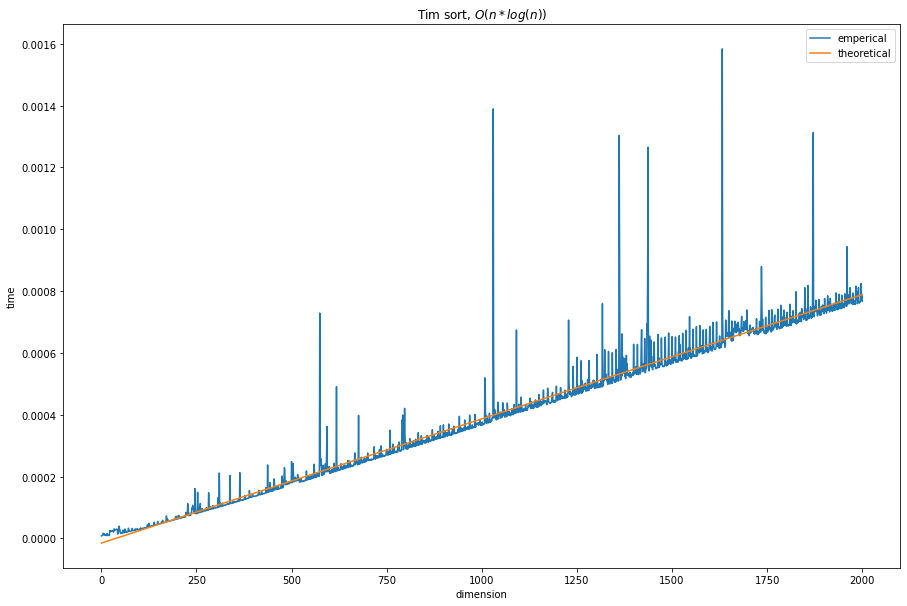

In [102]:
def tim_sort(array):
    return list(sorted(array))


timestamp_means = []

for i in range(LENGTH):
        t = %timeit -o -q -n1 -r 5  tim_sort(arrays[i])
        timestamp_means.append(t.average)
        
fig, ax = plt.subplots(1, 1, figsize=(15, 10))


x = np.array(list(range(LENGTH)))
y = timestamp_means
ax.plot(x, y, label='emperical')

k,b = np.polyfit(np.array(x), np.array(y), 1)
y1 = k * np.array(x) + b
ax.plot(x, y1, label='theoretical',)

ax.set_xlabel(r'dimension')
ax.set_ylabel('time')
ax.set_title('Tim sort, $O(n*log(n))$')
ax.legend()

plt.show()


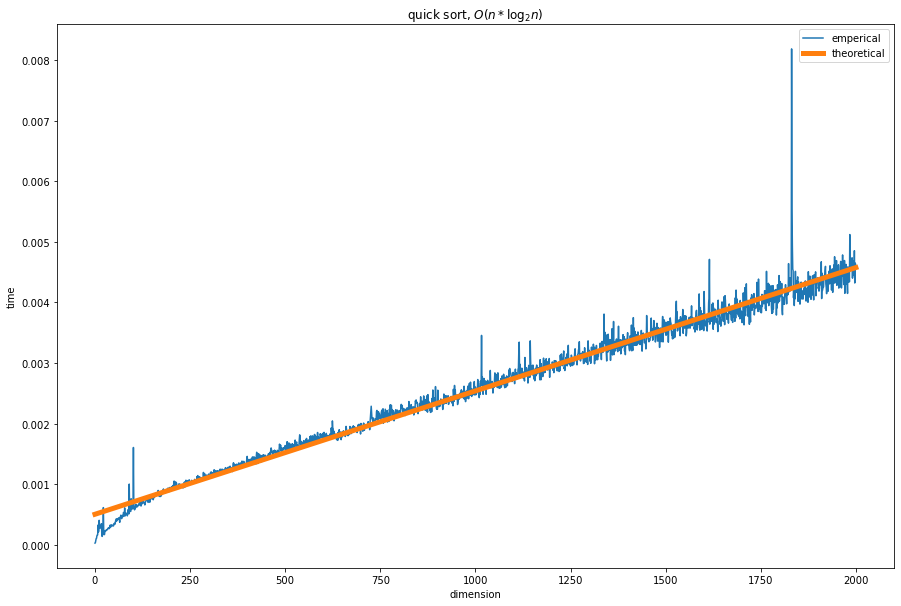

In [123]:
def quick_sort(array):
    array_ = list(np.copy(array))
    if len(array_) <= 1:
        return array_
    div_element = random.choice(array_)
    left = [element for element in array_ if element < div_element]
    right = [element for element in array_ if element > div_element]
    equals = [div_element] * array_.count(div_element)
    return quick_sort(left) + equals + quick_sort(right)




timestamp_means = []

for i in range(LENGTH):
        t = %timeit -o -q -n1 -r 5  quick_sort(arrays[i])
        timestamp_means.append(t.average)
        
fig, ax = plt.subplots(1, 1, figsize=(15, 10))


x = np.array(list(range(LENGTH)))
y = timestamp_means
ax.plot(x, y, label='emperical')

k,b = np.polyfit(np.array(x), np.array(y), 1)
y1 = k * np.array(x) + b
ax.plot(x, y1, label='theoretical', linewidth=5)

ax.set_xlabel(r'dimension')
ax.set_ylabel('time')
ax.set_title('quick sort, $O(n * \log_2 n)$')
ax.legend()

plt.show()


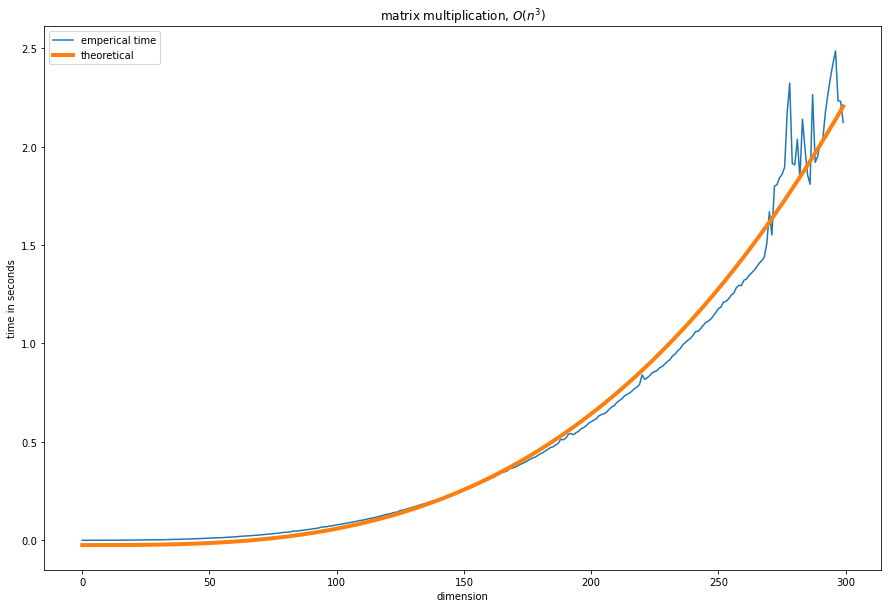

In [122]:
def matrices_multiply(X,Y):
    return [[sum(a*b for a,b in zip(X_row,Y_col)) for Y_col in zip(*Y)] for X_row in X]


matrices_X = []
matrices_Y = []

for i in range(300):
    matrices_X.append([[random.randint(1, 10) for _ in range(i)] for _ in range(i)])
    matrices_Y.append([[random.randint(1, 10) for _ in range(i)] for _ in range(i)])
    

timestamp_means = []

for i in range(300):
    t = %timeit -n1 -r 5 -o -q matrices_multiply(matrices_X[i], matrices_Y[i])
    timestamp_means.append(t.average)
    
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
x = np.array(list(range(300)))
y = timestamp_means
ax.plot(x, y, label='emperical time')
a = np.polyfit(x**3, np.array(y), 1)
y1 = a[0] * x**3 + a[1]
ax.plot(x, y1, label='theoretical', linewidth=4)

ax.set_xlabel('dimension')
ax.set_ylabel('time in seconds')
ax.set_title('matrix multiplication, $O(n^3)$')

ax.legend()

plt.show()
